# Task 5

## 1. Data Preprocessing
- Load the Iris dataset.
- Perform data exploration and visualization.
- Check for missing values and handle them if any.
- Split the dataset into features and target variables

In [108]:
#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [109]:
#load the dataset
iris = datasets.load_iris()

#store dataset in dataframe
df_no_target = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

df['target'] = iris.target


In [110]:
#display first 5 rows of dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [111]:
#display last 5 rows of dataframe
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [112]:
#inspect the dataset for outliers by comparing the mean and median
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [113]:
# get the null values per column as perctentage
NA_perc = round((df.isna().sum()/len(df))*100.0,2) 
NA_perc

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
target          0.0
dtype: float64

In [114]:
#check for duplicates
dup_rows = df.duplicated() 
dup_rows.sum() 

1

([], [])

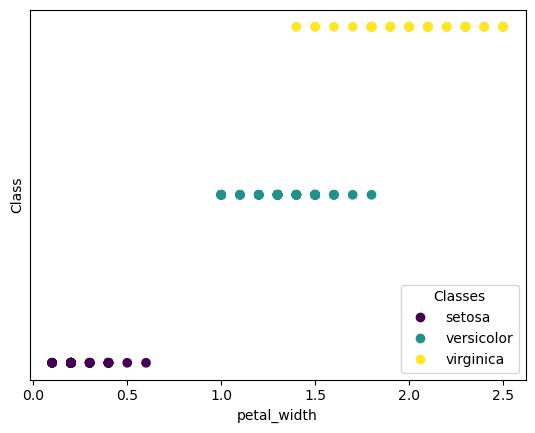

In [115]:
_, ax = plt.subplots()
scatter = ax.scatter(df['petal_width'],df['target'], c=df['target'])
ax.set(xlabel='petal_width', ylabel='Class')
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
plt.yticks([], [])

([], [])

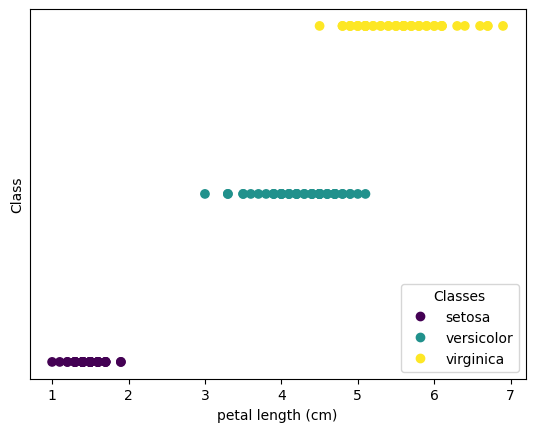

In [116]:
_, ax = plt.subplots()
scatter = ax.scatter(df['petal_length'],df['target'], c=df['target'])
ax.set(xlabel='petal length (cm)', ylabel='Class')
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
plt.yticks([], [])

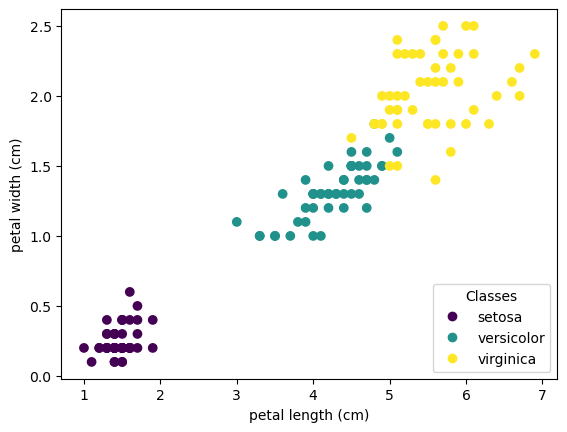

In [117]:
_, ax = plt.subplots()
scatter = ax.scatter(df['petal_length'],df['petal_width'], c=df['target'])
ax.set(xlabel='petal length (cm)', ylabel='petal width (cm)')
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

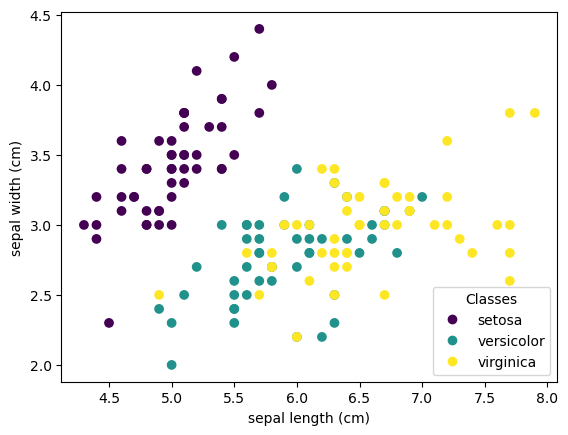

In [118]:
_, ax = plt.subplots()
scatter = ax.scatter(df['sepal_length'],df['sepal_width'], c=df['target'])
ax.set(xlabel='sepal length (cm)', ylabel='sepal width (cm)')
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [119]:
#coreelation between target and features
numerics = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

numeric_df = df[numerics + ['target']]


correlation_matrix = numeric_df.corr()


target_correlation = correlation_matrix['target'].sort_values(ascending = False)


print(target_correlation)

target          1.000000
petal_width     0.956547
petal_length    0.949035
sepal_length    0.782561
sepal_width    -0.426658
Name: target, dtype: float64


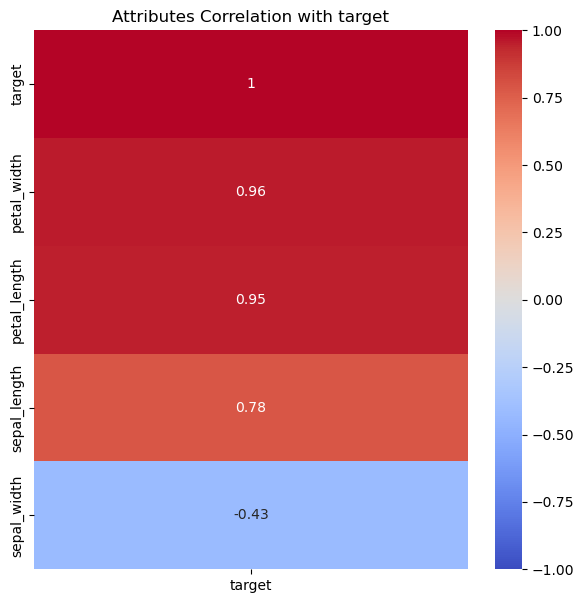

In [120]:

plt.figure(figsize = (7,7))
sns.heatmap(correlation_matrix[['target']].sort_values(by=['target'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.title('Attributes Correlation with target')
plt.show();

##  2. Unsupervised Learning: Clustering and Outlier Detection
- Apply K-means clustering algorithm to cluster the data.
- Visualize the clusters.
- Detect outliers using appropriate techniques such as isolation forest or DBSCAN.
- Evaluate the clustering results.

In [121]:
# Apply K-means clustering
kmeans = KMeans(n_clusters = 3,random_state = 42)
kmeans.fit(df_no_target)
cluster_labels = kmeans.labels_

C:\Users\alqah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alqah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


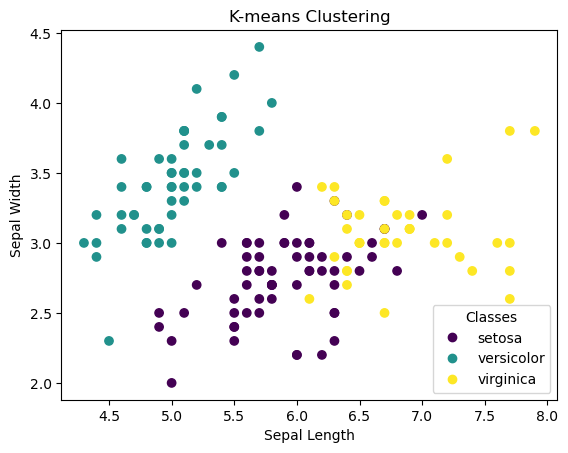

In [122]:
# Visualize the clusters
plt.scatter(df_no_target.iloc[:,0], df_no_target.iloc[:,1], c = cluster_labels, cmap = "viridis")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K-means Clustering")
plt.legend( scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
plt.show()

In [123]:
# Detect outliers using DBSCAN.
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
cluster_labels = dbscan.fit_predict(df_no_target)

In [124]:
num_outliers = len(cluster_labels[cluster_labels == -1])
print ("Number of outliers: ",num_outliers)


Number of outliers:  17


<function matplotlib.pyplot.show(close=None, block=None)>

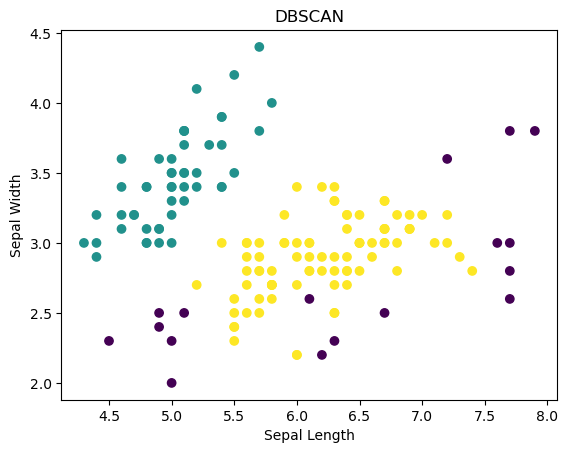

In [125]:
# Visualize the clusters and outliers
plt.scatter(df_no_target.iloc[:,0], df_no_target.iloc[:,1],c = cluster_labels, cmap = "viridis")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("DBSCAN")

plt.show

In [126]:
from sklearn.ensemble import IsolationForest

# Training model
clf = IsolationForest(random_state=42)
clf.fit(df_no_target)

IsolationForest(random_state=42)

In [127]:
#
outlier_preds = clf.predict(df_no_target)

In [128]:
outliers = df_no_target[outlier_preds == -1 ]
print("OutLiers: ",outliers)


OutLiers:       sepal_length  sepal_width  petal_length  petal_width
5             5.4          3.9           1.7          0.4
8             4.4          2.9           1.4          0.2
13            4.3          3.0           1.1          0.1
14            5.8          4.0           1.2          0.2
15            5.7          4.4           1.5          0.4
16            5.4          3.9           1.3          0.4
18            5.7          3.8           1.7          0.3
22            4.6          3.6           1.0          0.2
23            5.1          3.3           1.7          0.5
32            5.2          4.1           1.5          0.1
33            5.5          4.2           1.4          0.2
41            4.5          2.3           1.3          0.3
43            5.0          3.5           1.6          0.6
44            5.1          3.8           1.9          0.4
50            7.0          3.2           4.7          1.4
57            4.9          2.4           3.3          1.0
60 

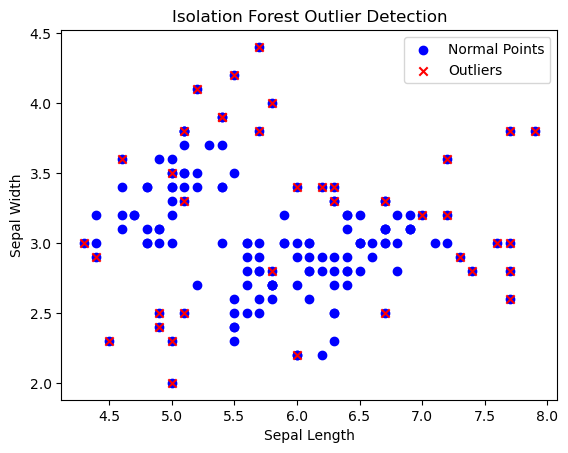

In [129]:
# Plotting the data points
plt.scatter(df_no_target.iloc[:, 0], df_no_target.iloc[:, 1], c='b', label='Normal Points', marker='o')

# Plotting the outliers
plt.scatter(outliers.iloc[:, 0], outliers.iloc[:, 1], c='r', label='Outliers', marker='x')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Isolation Forest Outlier Detection')
plt.legend()
plt.show()

In [130]:
# Calculate Inertia
inertia = kmeans.inertia_
print("Inertia: ",inertia)

Inertia:  78.85144142614602


In [131]:
#Evaluate the clustering results using silhouette score
silhouette_avg = silhouette_score(df_no_target,cluster_labels)
print("Silhouette Score: ", silhouette_avg)

Silhouette Score:  0.48603419703456857


## 3. Supervised Learning: Baseline Model
- Choose an appropriate evaluation metric based on the problem (classification).
- Split the dataset into training and testing sets.
- Build a baseline model (e.g., logistic regression or decision tree) using default parameters.
- Evaluate the baseline model's performance.


In [132]:
#we split the x and y which are the features and the target 

X = df[['sepal_length','sepal_width']]
y = df['target']

In [133]:
#we split our dataset into a training and testing dataset with a 80/20 split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
#we make the logistic regression model
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

LogisticRegression()

In [135]:
#we make the decision tree classifier model
baseline_model_tree = DecisionTreeClassifier()
baseline_model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [136]:
#we calculate and print their accuracies
baseline_accuracy =  baseline_model.score(X_test,y_test)
baseline_accuracy_tree=baseline_model_tree.score(X_test,y_test)

print("Baseline Model Accuracy (Logistic):", baseline_accuracy)
print("Baseline Model Accuracy (Decision Tree):", baseline_accuracy_tree)

Baseline Model Accuracy (Logistic): 0.9
Baseline Model Accuracy (Decision Tree): 0.6333333333333333


## 4. Model Comparison
- Select 3-4 machine learning algorithms (e.g., SVM, Random Forest, Gradient Boosting) suitable for the problem.
- Implement each algorithm and evaluate its performance using cross-validation.
- Compare the performance of algorithms based on evaluation metrics.
- Select the best-performing algorithm.


In [137]:
# We make the SVM model
svm = SVC(kernel='rbf', C=1, gamma=0.1, probability=True)
svm.fit(X_train, y_train)

#we calculate its accuracy 
svm_accuracy = svm.score(X_test,y_test)
print("Accuracy:", svm_accuracy)

Accuracy: 0.9


In [138]:
#we make the random forest classifier model 
rnd = RandomForestClassifier(n_estimators=100, random_state=42)
rnd.fit(X_train, y_train)

#we calculate its accuracy 
rf_accuracy = rnd.score(X_test, y_test)
print("Accuracy:", rf_accuracy)

Accuracy: 0.7666666666666667


In [139]:
#we make the gradient boosting regressor model 
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

#we calculate its accuracy
gb_accuracy = gb.score(X_test, y_test)
print("Accuracy:", gb_accuracy)

Accuracy: 0.7524094537820705


In [140]:
#we make the K nearest neighbot classifier 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#we calculate its accuracy 
knn_accuracy = knn.score(X_test, y_test)
print("Accuracy: ", knn_accuracy)

Accuracy:  0.8


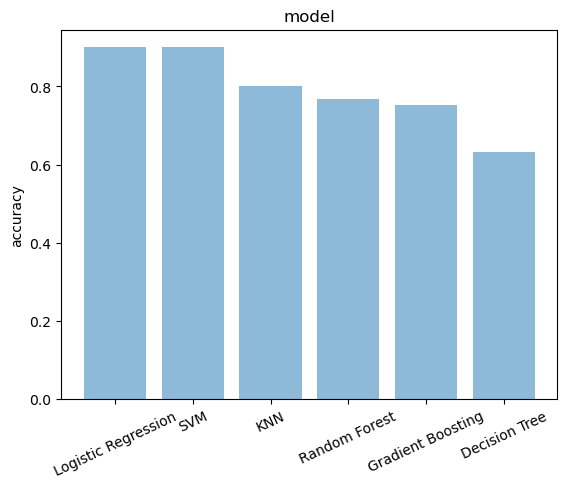

In [141]:
#we compare and plot all accuracies of the models we've built 
objects = ('Logistic Regression','SVM','KNN', 'Random Forest', 'Gradient Boosting','Decision Tree')
y_pos = np.arange(len(objects))
performance = [baseline_accuracy,svm_accuracy,knn_accuracy, rf_accuracy,gb_accuracy,baseline_accuracy_tree]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('accuracy')
plt.title('model')
plt.xticks(rotation=25)

plt.show()

We can see that Logisitic Regression, SVM, and KNN are the highest with 0.9, 0.9, and 0.8 respectively 

## 5. Model Tuning and Ensemble
- Perform hyperparameter tuning on the best-performing algorithm using Grid Search or Random Search.
- Evaluate the tuned model's performance.
- Implement an ensemble of the top-performing algorithms and compare its performance with the tuned model.

### Model Tuning

In [142]:
# we try to tune our models starting with the random forest model with grid search
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30]}
grid_search = GridSearchCV(rnd, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best Score: 0.7083333333333334


In [143]:
# we try to tune our models starting with the random forest model with random search
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30]}
random_search = RandomizedSearchCV(rnd, param_distributions, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 100, 'max_depth': None}
Best Score: 0.7083333333333334


In [144]:
# we try to tune our gradient boosting model with grid search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3, 5, 10],
}


grid_search = GridSearchCV(gb, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)


print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best score: 0.6343538705358823


In [145]:
# we try to tune our gradient boosting model with random search
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 10],
}

random_search = RandomizedSearchCV(gb, param_dist, cv=5, n_iter=10, random_state=42)
random_search.fit(X_train, y_train)


print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best hyperparameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
Best score: 0.6343538705358823


### Ensemble

In [146]:
#we create the ensemble of the 3 best scoring models
voting_clf = VotingClassifier(estimators=[('svc', svm), ('lr', baseline_model), ('knn', knn)], voting='soft')
voting_clf.fit(X_train,y_train)
voting_clf

VotingClassifier(estimators=[('svc', SVC(C=1, gamma=0.1, probability=True)),
                             ('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [147]:
#we print their accuracies
for clf in (svm, baseline_model, knn, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, clf.score(X_test,y_test)*100)

SVC 90.0
LogisticRegression 90.0
KNeighborsClassifier 80.0
VotingClassifier 90.0
